<h1>Linear Regression Multiple Inputs</h1> 


<h2>Objective</h2><ul><li> How to create a complicated models using pytorch build in functions for multiple linear regression model with multiple inputs.</li></ul> 


<h2>Preparation</h2>


We'll need the following libraries:


In [1]:
# Import the libraries we need for this lab

from torch import nn,optim
import torch
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from torch.utils.data import Dataset, DataLoader

Set the random seed:


In [2]:
# Set the random seed to 1. 

torch.manual_seed(1)

Use this function for plotting: 


In [3]:
# The function for plotting 2D

def Plot_2D_Plane(model, dataset, n=0):
    w1 = model.state_dict()['linear.weight'].numpy()[0][0]
    w2 = model.state_dict()['linear.weight'].numpy()[0][1]
    b = model.state_dict()['linear.bias'].numpy()

    # Data
    x1 = dataset.x[:, 0].view(-1, 1).numpy()
    x2 = dataset.x[:, 1].view(-1, 1).numpy()
    y = dataset.y.numpy()

    # Make plane
    X, Y = np.meshgrid(np.arange(x1.min(), x1.max(), 0.05), np.arange(x2.min(), x2.max(), 0.05))
    yhat = w1 * X + w2 * Y + b

    # Plotting
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')  # Use add_subplot instead of gca

    ax.plot(x1[:, 0], x2[:, 0], y[:, 0], 'ro', label='y')  # Scatter plot

    ax.plot_surface(X, Y, yhat, alpha=0.5)  # Plane plot with some transparency

    ax.set_xlabel('x1 ')
    ax.set_ylabel('x2 ')
    ax.set_zlabel('y')
    plt.title('estimated plane iteration:' + str(n))
    ax.legend()

    plt.show()

<!--Empty Space for separating topics-->


<h2 id=" #Makeup_Data" > Make Some Data </h2>


Create a dataset class with two-dimensional features:


In [4]:
                                        # How to get the Weight and Bias
# Weight
            # Getting the weight of the Linear Model, the row of the weight is derived in respect to the rows of the input data and the columns, or numbers of value data in the weight
            # is based on the output data column or numbers of value in the column.
            # For example, if we have an input data with the 4 rows and 5 columns, input = [[2,4,3,5,6],[4,3,2,4,3],[1,2,4,5,3],[1,3,5,3,2]]
            # And output with 4 rows and 2 columns, output=[[2,4],[2,5],[1,3],[5,4]]
            # The weight will be have 4 rows in relation to the input data rows, and 2 columns or 2 element of random numbers in the column number of the output data.
            # Based on the given example the weight will be, W = [[1,3],[4,2],[1,3],[5,3]]
# Bias 
            # Determining the Bias is based only on the output data column(s) or number(s) of element or value in the output column. The Bias is always set to 1 row and the columns corresponding
            # to the output columns only.
            # Based on the given example for the weight section, the output data has 2 values or column each. Therefore the Bias will always be set to 1 row with 2 values or columns or random
            # numbers in the column. B = [[2, 3]]


# Create a 2D dataset

class Data2D(Dataset):
    
    # Constructor
    def __init__(self):
        self.x = torch.zeros(20, 2)
        self.x[:, 0] = torch.arange(-1, 1, 0.1)
        self.x[:, 1] = torch.arange(-1, 1, 0.1)
        self.w = torch.tensor([[1.0], [1.0]])
        self.b = 1
        self.f = torch.mm(self.x, self.w) + self.b    
        self.y = self.f + 0.1 * torch.randn((self.x.shape[0],1))
        self.len = self.x.shape[0]

    # Getter
    def __getitem__(self, index):          
        return self.x[index], self.y[index]
    
    # Get Length
    def __len__(self):
        return self.len

Create a dataset object:


In [5]:
# Create the dataset object

data_set = Data2D()

<h2 id="Model_Cost">Create the Model, Optimizer, and Total Loss Function (Cost)</h2>


Create a customized linear regression module: 


In [6]:
# Create a customized linear

class linear_regression(nn.Module):
    
    # Constructor
    def __init__(self, input_size, output_size):
        super(linear_regression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
        
    # Prediction
    def forward(self, x):
        yhat = self.linear(x)
        return yhat

Create a model. Use two features: make the input size 2 and the output size 1: 


In [7]:
# Create the linear regression model and print the parameters

model = linear_regression(2,1)
print("The parameters: ", list(model.parameters()))
# using pytorch Linear model, the number to pass as the input size and output
# size is based on the number of elements, values or columns in the input data and output data respectively, and not the dimensions per say. 

The parameters:  [Parameter containing:
tensor([[ 0.6209, -0.1178]], requires_grad=True), Parameter containing:
tensor([0.3026], requires_grad=True)]


In [8]:
# Create the optimizer

optimizer = optim.SGD(model.parameters(), lr=0.1)

Create the criterion function that calculates the total loss or cost:


In [9]:
# Create the cost function

criterion = nn.MSELoss()

Create a data loader object. Set the batch_size equal to 2: 


In [10]:
# Create the data loader

train_loader = DataLoader(dataset=data_set, batch_size=2)

<!--Empty Space for separating topics-->


<h2 id="BGD">Train the Model via Mini-Batch Gradient Descent</h2>


Before Training: 


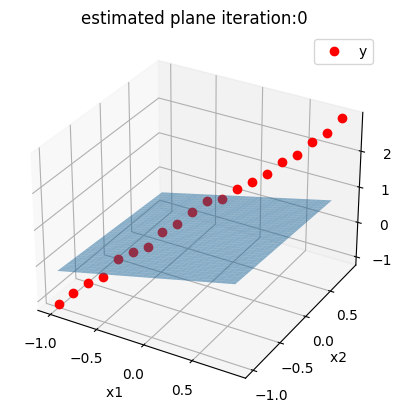

In [11]:
# Model's data performance plot before training
print("Before Training: ")
Plot_2D_Plane(model, data_set)   


In [12]:
#Training function

LOSS = []
epochs = 100

def train_model(epochs):    
    for epoch in range(epochs):
        for x,y in train_loader:
            yhat = model(x)
            loss = criterion(yhat, y)
            LOSS.append(loss.item())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()     


In [13]:
# Train the model
train_model(epochs)


After Training: 


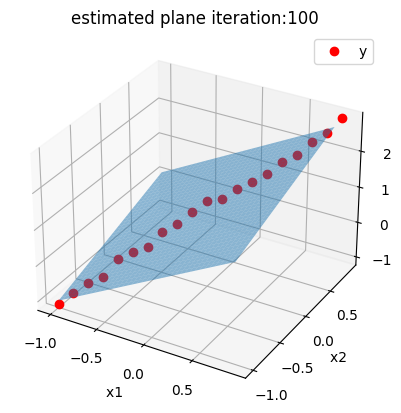

In [14]:
# plot model's performance 
print("After Training: ")
Plot_2D_Plane(model, data_set, epochs)

Text(0, 0.5, 'Cost/total loss ')

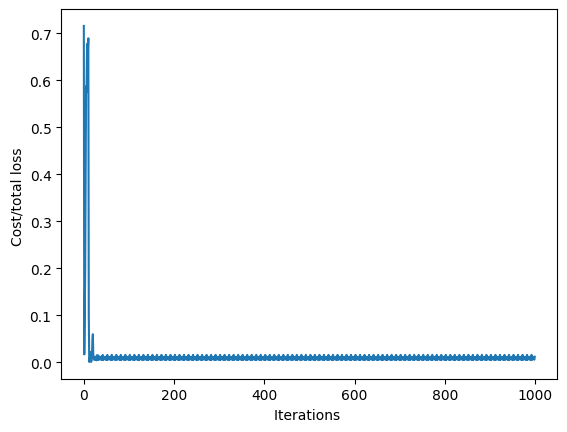

In [15]:
# Plot out the Loss and iteration diagram

plt.plot(LOSS)
plt.xlabel("Iterations ")
plt.ylabel("Cost/total loss ")